In [9]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

#importing the dataset
data = pd.read_excel('Dataset-Kmeans-xclara.csv.xlsx')

print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


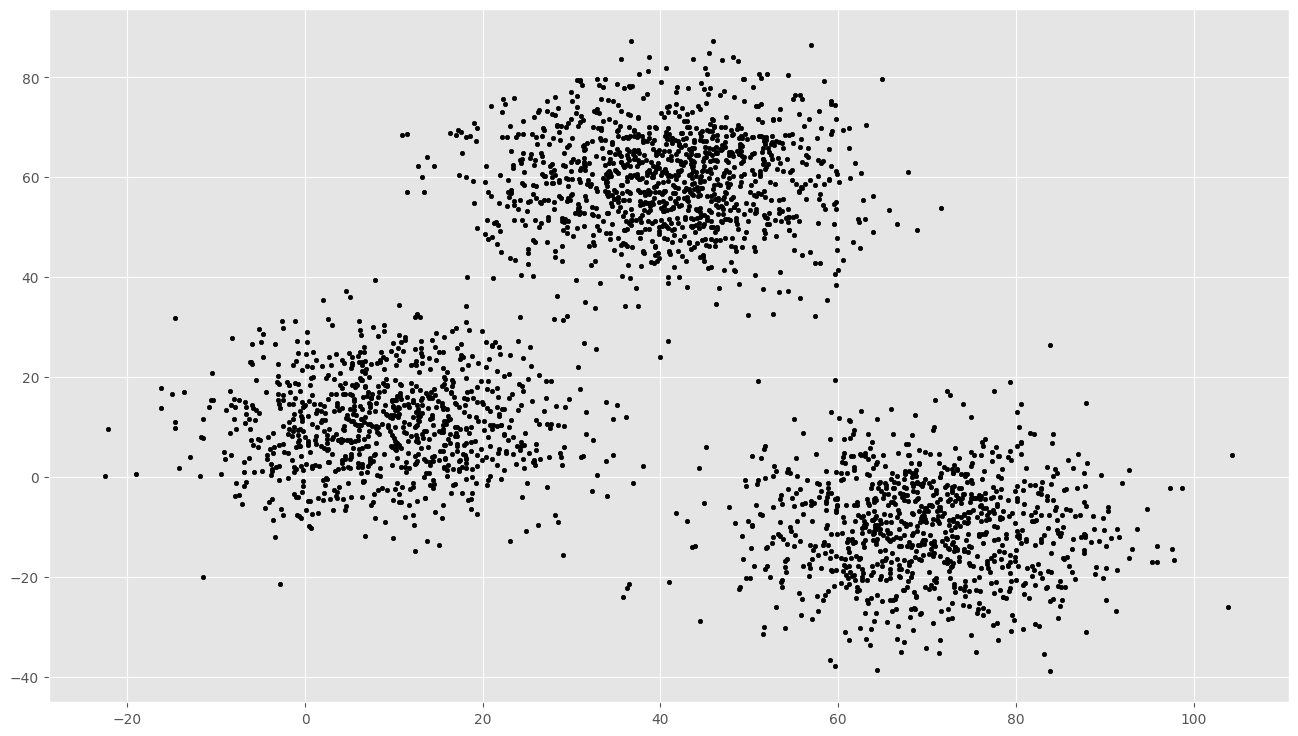

In [13]:
#Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1,f2)))
plt.scatter(f1, f2, c='black', s=10)


In [14]:
#Euclidean Distance Calculator
def dist(a, b, ax=1):
  return np.linalg.norm(a - b, axis = ax)


In [15]:
#Number of clusters
k = 3
# x coordinates of random centroids 
C_x = np.random.randint(0, np.max(X)-20, size = k)
# y coordinates of random centroids 
C_y = np.random.randint(0, np.max(X)-20, size = k)
C = np.array(list(zip(C_x,C_y)), dtype = np.float32)
print(C)

[[73. 56.]
 [52. 40.]
 [61. 63.]]


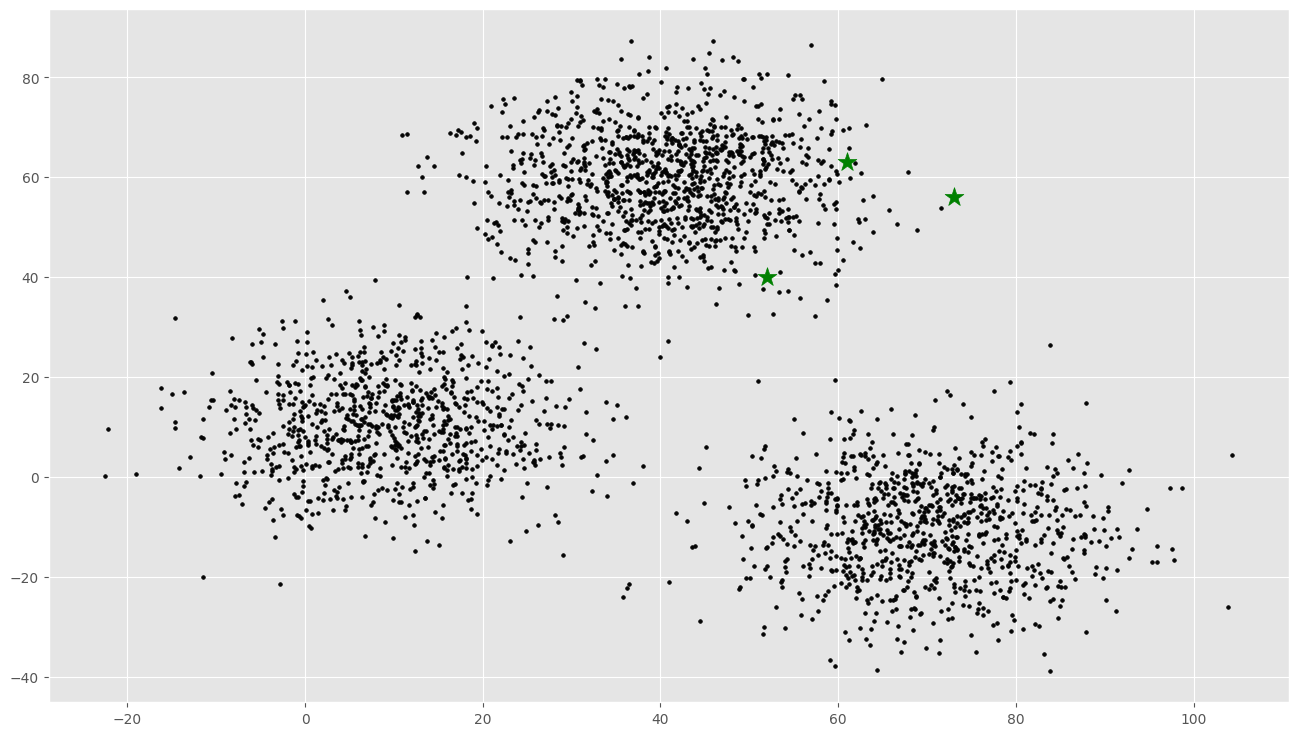

In [16]:
#Plotting along with the centroids
plt.scatter(f1,f2,c = '#050505', s=7)
plt.scatter(C_x, C_y, marker = '*', s=200, c = 'g')


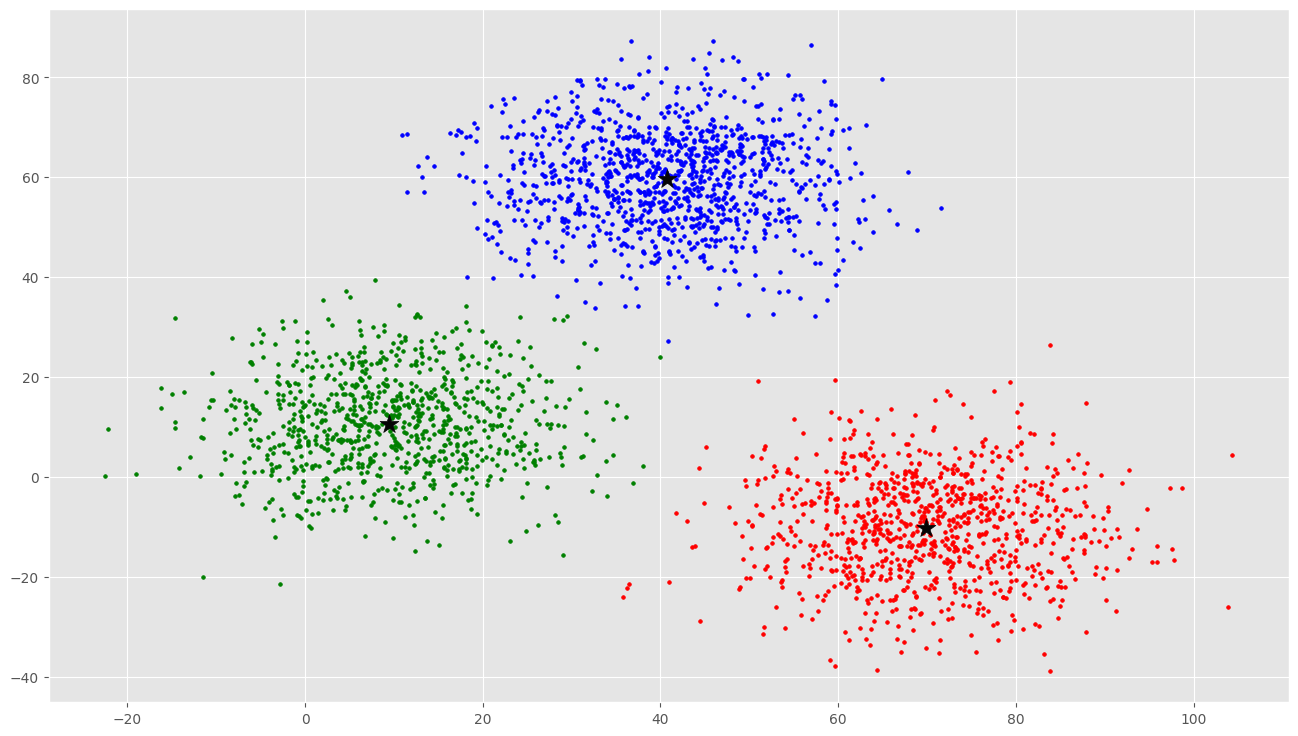

In [20]:
#To store the value of centroids when it updates
C_old = np.zeros(C.shape)

#Cluster labels(0,1,2)
clusters = np.zeros(len(X))

#eRROR FUNCTION: Distance between new centroids and old centroids
error = dist(C, C_old, None)

#Loop will run till the eroor becomes 0
while error != 0:
    #Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    #Storing the old centroid values
    C_old = deepcopy(C)
    #Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters [j] == i]
        C[i] = np.mean(points, axis = 0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters [j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker = '*', s=200, c='#050505')

From the abpve visualization it is clear that there are 3 cluster with black stars as their centroid. If we run K means on the values of k, we will get completely misleading cluster.


# **K Means using Scikit Learn**

In [21]:
from sklearn.cluster import KMeans

# Create an instance of KMeans to find three clusters
kmeans = KMeans(n_clusters=3)

# Fit the input data to the KMeans model
kmeans = kmeans.fit(X)

# Predict the clusters for each data point
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with Scikit learn centroids
print(C) # From scratch

print(centroids) # From Scikit Learn


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 69.92419  -10.119641]
 [  9.478045  10.686052]
 [ 40.683628  59.715893]]
[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


It looks like the C centroids computed from scratch and the centroids computed by Scikit-learn are very similar. The values of each centroid are not exactly the same due to the random initialization of the KMeans algorithm. However, both sets of centroids have similar coordinates for each of the three clusters.

Overall, this suggests that the KMeans algorithm implemented from scratch and the one from Scikit-learn are producing similar results.